# Assignemnt 1

## Markov Chain Simulation and Visualization

In this assignment, we implement a Markov chain model to simulate state transitions based on a given transition probability matrix.

-Define the initial state: Start the simulation from a specified initial state (e.g., Stop 3).

-Simulate multiple transitions: Use the transition probability matrix to simulate multiple steps (transitions) between states.

-Record the sequence of states: Track and store the sequence of states visited at each step during the simulation.

-Visualize the transition probabilities: Create a directed graph using the NetworkX library to represent the states and transitions, with edges showing the transition probabilities.

-Analyze the system evolution: Use the graph to help visualize how the system evolves over time and understand the transition dynamics between different states.

### NetworkX is a Python library used for the creation, manipulation, and study of complex networks (also called graphs). It allows you to work with structures made up of nodes (vertices) and edges (connections between nodes). These can represent various real-world systems like social networks, transportation systems, or the relationships between entities in a data structure.

Key Features of NetworkX:

Graph Creation: Easily create and modify different types of graphs (directed, undirected, weighted, etc.).

Node & Edge Operations: Add/remove nodes and edges, retrieve neighbors, and calculate the shortest path or centrality measures.

Visualization: Visualize graphs using built-in drawing functions or export to various formats for use in other tools.

Algorithms: It provides many graph algorithms like shortest path, community detection, and clustering.

### Importing Libraries

In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

### Defineing the Transition Probability Matrix

In [2]:
# Transition matrix for bus stops
T = np.array([
    [0.25, 0.35, 0.40, 0.00],  # From Stop 1
    [0.55, 0.00, 0.00, 0.45],  # From Stop 2
    [0.00, 0.20, 0.60, 0.20],  # From Stop 3
    [0.30, 0.30, 0.20, 0.20]   # From Stop 4
])

In [3]:
print("Transition Matrix:")
print(T)

Transition Matrix:
[[0.25 0.35 0.4  0.  ]
 [0.55 0.   0.   0.45]
 [0.   0.2  0.6  0.2 ]
 [0.3  0.3  0.2  0.2 ]]


each row corresponds to a bus stop, and the columns represent the probabilities of moving to the other stops.

### Function for Simulating the Markov Chain

In [4]:
def simulate_markov_chain(T, initial_state, num_steps):
    # Number of states (bus stops)
    num_states = len(T)

    # List to record the states
    states = [initial_state]

    # Start from the initial state
    current_state = initial_state

    for _ in range(num_steps):
        # Get the probabilities for the next state from the transition matrix
        next_state_probabilities = T[current_state]

        # Transition to the next state based on the probabilities
        next_state = np.random.choice(num_states, p=next_state_probabilities)

        # Record the next state
        states.append(next_state)

        # Update the current state
        current_state = next_state

    return states


This function simulates the Markov chain based on the transition matrix T, starting from an initial state (initial_state) and running for a specified number of steps (num_steps). The function:

-Selects the next state using the transition probabilities.

-Records the state at each step.

-Updates the current state for the next step.

### Running the Simulation

In [5]:
initial_state = 2  # Starting from Stop 3 (index 2)
num_steps = 50     # Simulate for 50 steps
simulated_states = simulate_markov_chain(T, initial_state, num_steps)


In [6]:
print("Simulated states over 50 steps:")
print(simulated_states)

Simulated states over 50 steps:
[2, 2, 1, 3, 3, 1, 3, 0, 1, 3, 3, 0, 2, 3, 1, 3, 3, 3, 1, 0, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 3, 2, 3, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0]


an array of the states visited over 50 steps

### Visualizeing the Transition Matrix as a Graph Using NetworkX

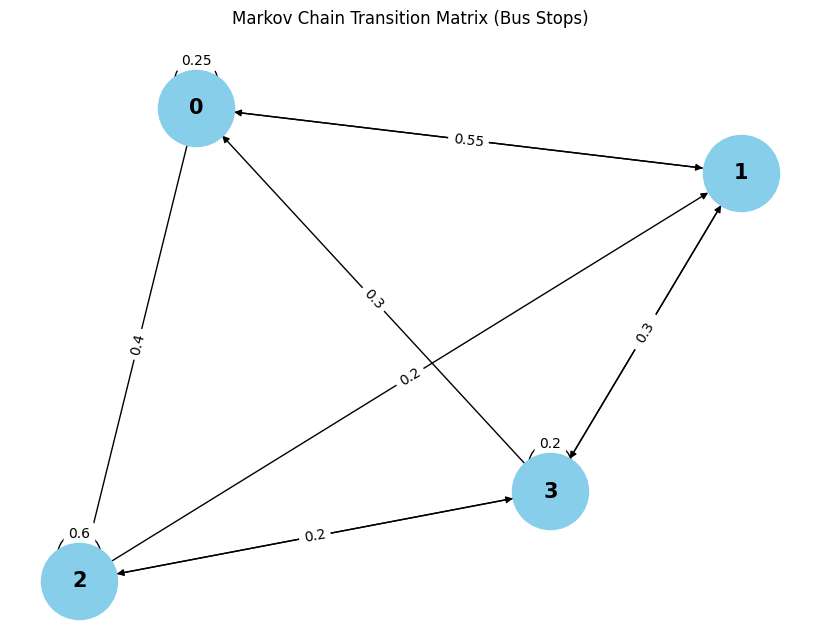

In [8]:
# Create a directed graph for the transitions
G = nx.DiGraph()
# Add nodes (bus stops)
G.add_nodes_from([0, 1, 2, 3])

# Add edges based on the transition matrix
for i in range(4):
    for j in range(4):
        if T[i, j] > 0:  # Only add an edge if the probability is greater than 0
            G.add_edge(i, j, weight=T[i, j])

# Step 6: Plot the Transition Matrix as a Graph using NetworkX
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=15, font_weight='bold', arrows=True)

# Draw edge labels (transition probabilities)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Markov Chain Transition Matrix (Bus Stops)")
plt.show()


This step prints the sequence of states visited during the simulation, giving an overview of how the Markov chain evolved over 50 transitions. You can analyze this sequence to understand the behavior of the system over time.